<a href="https://colab.research.google.com/github/Patarakorn/Health-Insurance-Cost-Predictor/blob/main/Machine_Learning_Insurance_Cost_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn. ensemble import GradientBoostingRegressor
import pickle

**Importing and Describing the Dataset**

In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/Train_Data.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


*Numerical Data:*
- age
- bmi
- children
- charges

*Categorical Data:*
- sex
- smoker
- region

In [ ]:
# last 5 rows of the dataframe
insurance_dataset.tail()

,age,sex,bmi,smoker,region,children,charges
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452
3629,37.598865,female,25.219233,no,northeast,3,7027.698968


In [ ]:
# number of rows and columns
insurance_dataset.shape

(3630, 7)

*Rows* = 3,630
*Columns* = 7

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


All Data Types are correct, except for age which should be int64

In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

No null values or rows

**Data Manipulation & Cleaning**

*Manipulate age column's data type into int64*

In [ ]:
# Round the values in the age column to 0 decimals
insurance_dataset['age'] = insurance_dataset['age'].round(0)

# Change the data type of the age column from float64 to int64
insurance_dataset['age'] = insurance_dataset['age'].astype('int64')

# Print the updated insurance_dataset
print(insurance_dataset)

# Print the data type of the values in the age column
print(insurance_dataset['age'].dtype)

      age     sex        bmi smoker     region  children       charges
0      21    male  25.745000     no  northeast         2   3279.868550
1      37  female  25.744165    yes  southeast         3  21454.494239
2      18    male  30.030000     no  southeast         1   1720.353700
3      37    male  30.676891     no  northeast         3   6801.437542
4      58    male  32.010000     no  southeast         1  11946.625900
...   ...     ...        ...    ...        ...       ...           ...
3625   49  female  41.426984     no  northwest         4  10987.324964
3626   39  female  26.202557     no  southeast         2  11735.844352
3627   56    male  40.300000     no  southwest         0  10602.385000
3628   48  female  34.930624     no  southeast         1   8976.140452
3629   38  female  25.219233     no  northeast         3   7027.698968

[3630 rows x 7 columns]
int64


*Change the currency of the charges column to THB*
- 1 USD equals 34.53 THB as of Jun 13 2023



In [ ]:
# Define the USD-THB conversion rate
usd_to_thb =  34.53
# Multiply every value in the charges column with the conversion rate
insurance_dataset['charges'] = insurance_dataset['charges'] * usd_to_thb
# Print the updated DataFrame
print(insurance_dataset)

      age     sex        bmi smoker     region  children        charges
0      21    male  25.745000     no  northeast         2  113253.861032
1      37  female  25.744165    yes  southeast         3  740823.686060
2      18    male  30.030000     no  southeast         1   59403.813261
3      37    male  30.676891     no  northeast         3  234853.638320
4      58    male  32.010000     no  southeast         1  412516.992327
...   ...     ...        ...    ...        ...       ...            ...
3625   49  female  41.426984     no  northwest         4  379392.331003
3626   39  female  26.202557     no  southeast         2  405238.705469
3627   56    male  40.300000     no  southwest         0  366100.354050
3628   48  female  34.930624     no  southeast         1  309946.129792
3629   38  female  25.219233     no  northeast         3  242666.445373

[3630 rows x 7 columns]


**Data Analysis**

In [ ]:
# Description of dataset (Numerical Data):
insurance_dataset.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3.630000e+03
mean,38.887879,30.629652,2.503581,4.414594e+05
std,12.154074,5.441307,1.712568,3.710651e+05
min,18.000000,15.960000,0.000000,3.873831e+04
25%,29.000000,26.694526,1.000000,1.952609e+05
50%,39.000000,30.200000,3.000000,3.260947e+05
75%,48.000000,34.100000,4.000000,5.069145e+05
max,64.000000,53.130000,5.000000,2.201993e+06


In [ ]:
# Description of dataset (Categorical):
insurance_dataset.describe(include=['O'])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


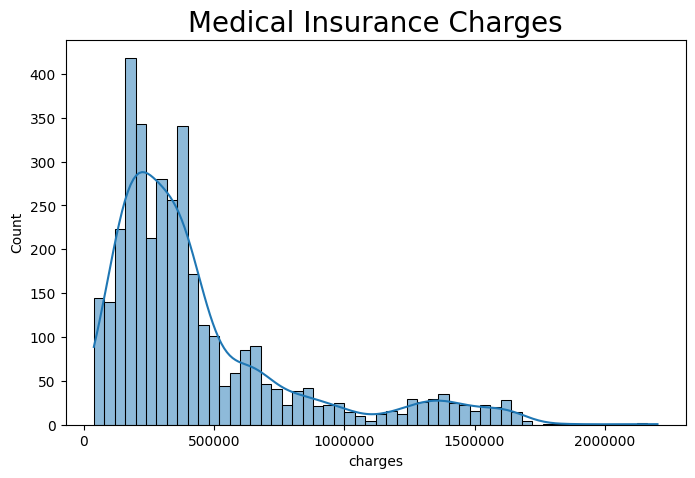

In [ ]:
# Histrogram of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.histplot(insurance_dataset['charges'], kde=True)
plt.title('Medical Insurance Charges', fontsize=20)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='both')
plt.show()

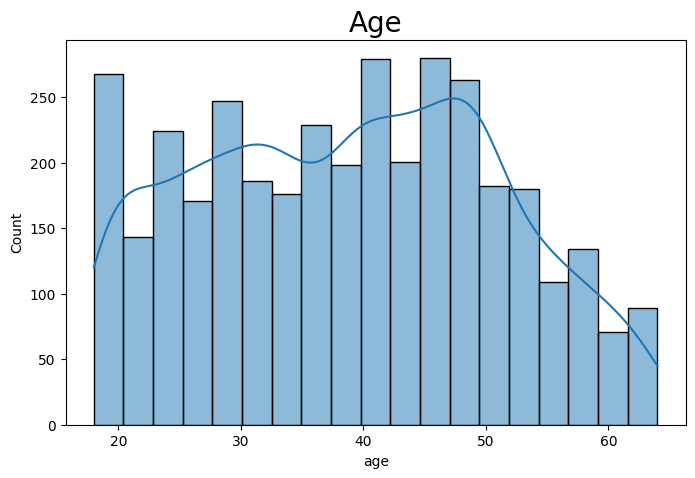

In [ ]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(insurance_dataset['age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

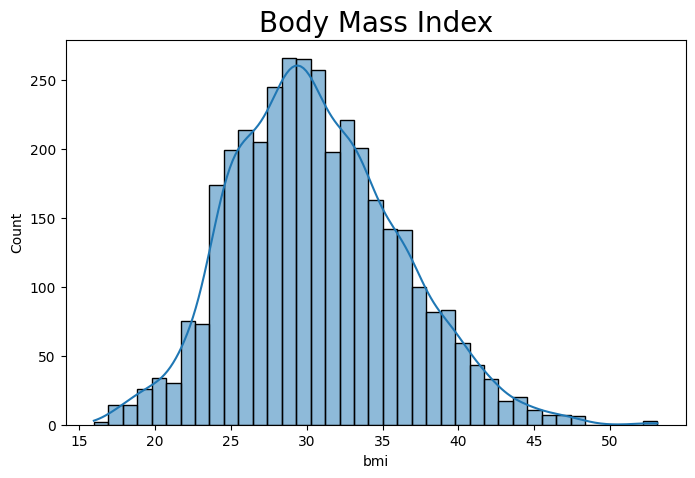

In [ ]:
# Histrogram of Body Mass Index:
plt.figure(figsize=(8,5))
sns.histplot(insurance_dataset['bmi'], kde=True)
plt.title('Body Mass Index', fontsize=20)
plt.show()

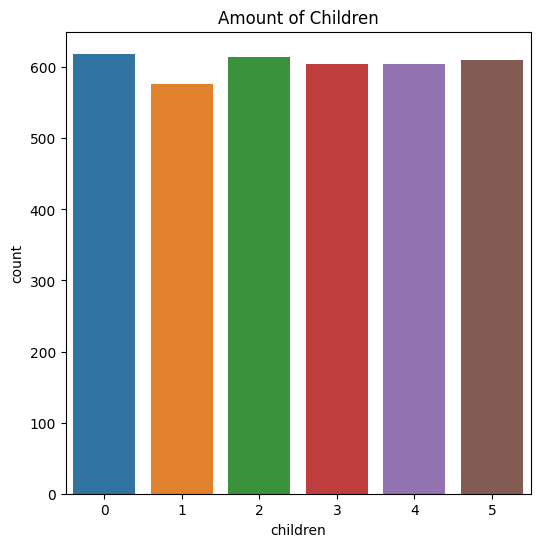

0    619
2    615
5    610
3    605
4    604
1    577
Name: children, dtype: int64

In [ ]:
# countplot of Amount of Children
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Amount of Children')
plt.show()
insurance_dataset['children'].value_counts()

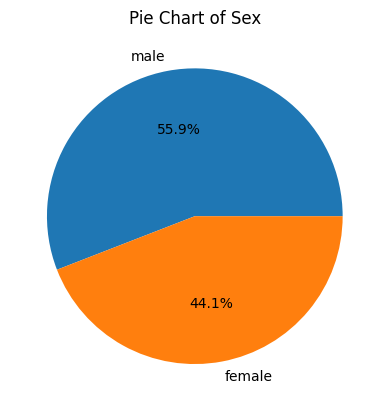

Male   : 2029
Female : 1601


In [ ]:
# pie chart of Sex
category_counts = insurance_dataset['sex'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Sex')
plt.show()

# Value Counts:
print("Male   :", insurance_dataset['sex'].value_counts()[0])
print("Female :", insurance_dataset['sex'].value_counts()[1])

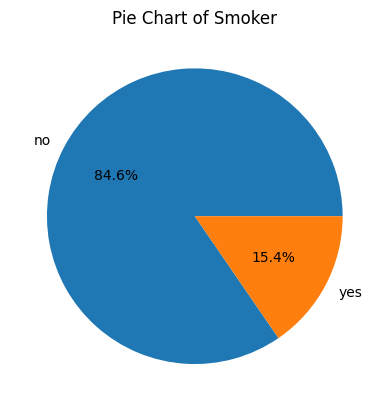

No  : 3070
Yes : 560


In [ ]:
# pie chart of Smoker
category_counts = insurance_dataset['smoker'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Smoker')
plt.show()

# Value Counts:
print("No  :", insurance_dataset['smoker'].value_counts()[0])
print("Yes :", insurance_dataset['smoker'].value_counts()[1])

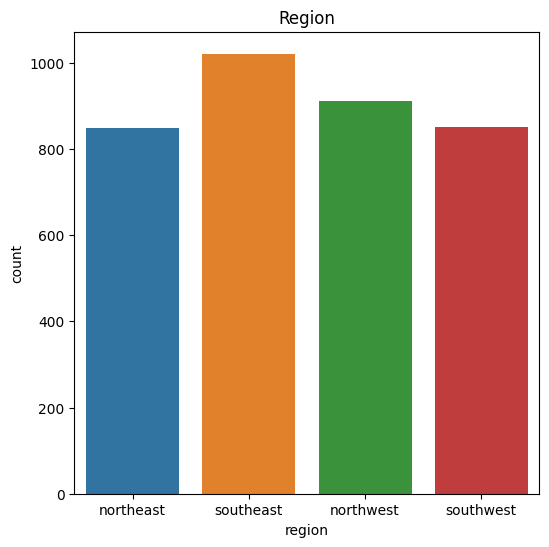

South-East region : 1021
North-West region : 911
South-West region : 850
North-East region : 848


In [ ]:
# Countplot of Region
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region')
plt.show()
print("South-East region :", insurance_dataset['region'].value_counts()[0])
print("North-West region :", insurance_dataset['region'].value_counts()[1])
print("South-West region :", insurance_dataset['region'].value_counts()[2])
print("North-East region :", insurance_dataset['region'].value_counts()[3])

**Data Pre-Processing**

In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
# Splitting the Features and Target
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex        bmi  smoker  region  children
0      21    0  25.745000       1       2         2
1      37    1  25.744165       0       0         3
2      18    0  30.030000       1       0         1
3      37    0  30.676891       1       2         3
4      58    0  32.010000       1       0         1
...   ...  ...        ...     ...     ...       ...
3625   49    1  41.426984       1       3         4
3626   39    1  26.202557       1       0         2
3627   56    0  40.300000       1       1         0
3628   48    1  34.930624       1       0         1
3629   38    1  25.219233       1       2         3

[3630 rows x 6 columns]


In [ ]:
print(Y)

0       113253.861032
1       740823.686060
2        59403.813261
3       234853.638320
4       412516.992327
            ...      
3625    379392.331003
3626    405238.705469
3627    366100.354050
3628    309946.129792
3629    242666.445373
Name: charges, Length: 3630, dtype: float64


In [ ]:
# Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(3630, 6) (2904, 6) (726, 6)


**Model Building & Testing**

In [ ]:
# Linear Regression:
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, Y_train)

# Prediction:
Y_pred1 = LinearRegression.predict(X_test)

# Scores:
print(r2_score(Y_test, Y_pred1))
print(mean_squared_error(Y_test, Y_pred1))

0.7408239267984487
37929644864.8891


In [ ]:
# SVR:
svm = SVR()
svm = svm.fit(X_train, Y_train)

# Prediction:
Y_pred2 = svm.predict(X_test)

# Scores:
print(r2_score(Y_test, Y_pred2))
print(mean_squared_error(Y_test, Y_pred2))

-0.09543494148331555
160313634626.06863


In [ ]:
# GradientBoostingRegressor:
gr = GradientBoostingRegressor()
gr = gr.fit(X_train, Y_train)

# Prediction:
Y_pred3 = gr.predict(X_test)

# Scores:
print(r2_score(Y_test, Y_pred3))
print(mean_squared_error(Y_test, Y_pred3))

0.8876146936979735
16447254190.600685


In [ ]:
# Ridge:
Ridge = Ridge()
Ridge = Ridge.fit(X_train, Y_train)

# Prediction:
Y_pred4 = Ridge.predict(X_test)

# Scores:
print(r2_score(Y_test, Y_pred4))
print(mean_squared_error(Y_test, Y_pred4))


0.7406623543886348
37953290504.89167


In [ ]:
# Lasso:
Lasso = Lasso()
Lasso = Lasso.fit(X_train, Y_train)

# Prediction:
Y_pred5 = Lasso.predict(X_test)

# Scores:
print(r2_score(Y_test, Y_pred5))
print(mean_squared_error(Y_test, Y_pred5))


0.7408231547141084
37929757857.128174


In [ ]:
# Random Forest Regressor:
Rf = RandomForestRegressor()
Rf = Rf.fit(X_train, Y_train)

# Prediction:
Y_pred6 = Rf.predict(X_test)

# Scores:
print(r2_score(Y_test, Y_pred6))
print(mean_squared_error(Y_test, Y_pred6))

0.9078876580202564
13480366361.781801


In [ ]:
df = pd.DataFrame({'Actual':Y_test, 'Lr': Y_pred1, 'svm' : Y_pred2, 'gr':Y_pred3, 'ridge':Y_pred4, 'lasso':Y_pred5, 'rf':Y_pred6})
print(df)

             Actual            Lr            svm            gr         ridge  \
304   381520.730819  5.074744e+05  325074.122252  3.971947e+05  5.076599e+05   
88    368038.190177  4.272925e+05  325050.560805  3.836714e+05  4.274292e+05   
1239  960235.277703  1.181781e+06  325235.243447  1.048076e+06  1.180124e+06   
905    72655.035702  1.215314e+05  324644.793082  1.301947e+05  1.220779e+05   
3499  436790.828898  5.070406e+05  325175.464251  4.755207e+05  5.071919e+05   
...             ...           ...            ...           ...           ...   
989   372675.640845  4.685954e+05  325071.727285  3.957710e+05  4.687549e+05   
2318  332756.384411  4.004725e+05  325007.225742  3.294209e+05  4.007235e+05   
2872  632269.921260  9.758914e+05  324708.722568  6.398287e+05  9.742519e+05   
725   231819.376134  3.940309e+05  324797.755064  3.873026e+05  3.942149e+05   
3568  357332.316058  4.663078e+05  325134.635591  4.489889e+05  4.666430e+05   

             lasso            rf  
304 

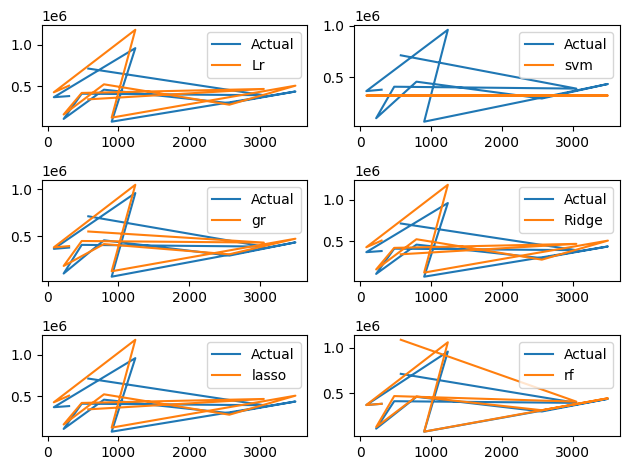

In [ ]:
plt.subplot(321)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['Lr'].iloc[0:11], label='Lr')
plt.legend()

plt.subplot(322)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['svm'].iloc[0:11], label='svm')
plt.legend()

plt.subplot(323)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['gr'].iloc[0:11], label='gr')
plt.legend()

plt.subplot(324)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['ridge'].iloc[0:11], label='Ridge')
plt.legend()

plt.subplot(325)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['lasso'].iloc[0:11], label='lasso')
plt.legend()

plt.subplot(326)
plt.plot(df['Actual'].iloc[0:11], label='Actual')
plt.plot(df['rf'].iloc[0:11], label='rf')

plt.tight_layout()
plt.legend()

In [ ]:
# Finding mean absolute error
s1 = metrics.mean_absolute_error(Y_test, Y_pred1)
s2 = metrics.mean_absolute_error(Y_test, Y_pred2)
s3 = metrics.mean_absolute_error(Y_test, Y_pred3)
s4 = metrics.mean_absolute_error(Y_test, Y_pred4)
s5 = metrics.mean_absolute_error(Y_test, Y_pred5)
s6 = metrics.mean_absolute_error(Y_test, Y_pred6)
print(s1, s2, s3, s4, s5, s6)

133594.75591551434 248043.9706503724 71052.79740163434 133773.07609631686 133595.3638467416 49348.095884618786


**Building a Predictive System**

In [ ]:
input_data = {'age':40,
              'sex':1,
              'bmi':40.3,
              'smoker':1,
              'region':2,
              'children':4}

df1 = pd.DataFrame(input_data, index=[0])
print(df1)

   age  sex   bmi  smoker  region  children
0   40    1  40.3       1       2         4


In [ ]:
new_pred = Rf.predict(df1)
print(new_pred)

[576145.11218934]


**Save Model Using Joblib**

In [ ]:
Rf = RandomForestRegressor()
Rf.fit(X, Y)

RandomForestRegressor()

In [ ]:
import joblib
joblib.dump(gr, 'model_joblib_Rf')

['model_joblib_Rf']

In [ ]:
model = joblib.load('model_joblib_Rf')

In [ ]:
model.predict(df1)

array([566205.60193249])